## SY06 - TP3

# Signaux déterministe et analyse de Fourier

### Victor Demessance - Yara Sakr

#### Exercice 1 :

Objectif : analyser la structure p ́eriodique d’un  ́electro-cardiogramme pour obtenir la meilleure estimation de la fr ́equence de battement.

##### 1. Représentation temporelle

In [6]:
import numpy as np
import plotly.graph_objects as go

ECG_signal = np.loadtxt('AC05_SY06_TP3_Ex1.csv')  # Chargement des données

# 1. Création du vecteur temps
f_echantillon = 100  # Hz
N = 1024  # Nombre de points de l'échantillon
t_echantillon= np.arange(N) / f_echantillon

# 2. Affichage 
fig = go.Figure()
fig.update_layout(title="Signal ECG d'un chien anesthésié")
fig.update_xaxes(title_text="Temps (seconde)")
fig.update_yaxes(title_text="Tension (mV)")

fig.add_trace(go.Scatter(x=t_echantillon, y=ECG_signal))
    
fig.show()

Nous avons ici un signal discret, déterministe et périodique composite. Il est composé par ailleurs d'un signal de bruit aléatoire ergotique.

##### 2. Représentation fréquentielle

1) Quelle est la transformée de Fourier du modèle ? Quelle forme a le spectre d’amplitude théorique ? 

La représentation du signal ECG peut être formulée comme suit :

$$ 
\def\dirac{%
    \rule{1pt}{1.5ex}
    \rule{0.5em}{1pt} 
    \rule{1pt}{1.5ex}
    \rule{0.5em}{1pt}
    \rule{1pt}{1.5ex} 
}
$$

$$ 
x(t) = h(t) * \dirac_T(t)
$$

Ainsi, les propriétés de convolution de la transformée de Fourier nous permet de définir le modèle fréquentiel comme la multiplication des fonctions fréquentilles du modèle :

$$
X(f) = H(f).\frac{\dirac_\frac{1}{T}(f)}{T}
$$

Notre spectre d'amplitude théorique est donc une suite de pic (à des fréquences multiples de $\frac{1}{T}$) dont la valeur dépendra de l'amplitude de $|H(f)|$

2) Proposer une formule qui donne le nombre minimum Nmin de points du signal à analyser pour faire ressortir la structure harmonique du spectre estim ́e en fonction de T.

Afin d'obtenir le nombre de point minimum $N_{min}$ qui permettra de faire ressortir la structure harmonique de notre signal, il faut prendre en compte la période $T$ de notre signal ainsi que la fréquence d'échantillonage $f_{e}$
L'objectif est de calculer combien de points minimum permettront de composer une période complète de notre signal, on pose :
$$
N_{min} = T.f_{e}
$$

3) Quel est l’avantage de disposer d’un signal sur N = 1024 points ? Que faire sinon ?

Les algorithmes tel que la tranformée de Fourier rapide (FFT) nécessite un nombre de points puissance de 2. Ainsi, 1024 points (=$2^{10}$) permet d'utiliser ces outils très efficaces. 
Si l'on ne peut pas acquérir 1024 points, il peut être intéressant d'utiliser des méthodes tel que le zéro padding, qui permettent à la fois d'améliorer la résolution fréquentielle tout en permettant l'augmentation de la longueur du signal vers une puissance de 2 désirée (ici, 1024).

4) Estimer le spectre d’amplitude du signal avec une TFR. Il est demandé de représenter le résultat sur un axe fréquentiel gradué en Hz entre 0 et fe/2 et de spécifier la résolution fréquentielle ∆f.

In [7]:
# 1. Calcul de la transformée de Fourier rapide du signal
Te = 1/f_echantillon

frequencies = np.fft.fftfreq(N, Te)
amplitude_spectrum = np.abs(np.fft.fft(ECG_signal)) / N


# 2. Affichage 
fig = go.Figure()
fig.update_layout(title="Spectre d'amplitude du signal ECG de chien anesthésié")
fig.update_xaxes(title_text="Fréquence (Hz)")
fig.update_yaxes(title_text="Amplitude (u.a.)")

fig.add_trace(go.Scatter(x=frequencies[:N//2], y=amplitude_spectrum[:N//2]))
    
fig.show()

In [8]:
resolution_frequentielle = f_echantillon / N
print(f"La résolution fréquentielle est de : {resolution_frequentielle} Hz")

La résolution fréquentielle est de : 0.09765625 Hz


5) Le spectre d’amplitude estimé se rapproche-t-il bien de la théorie ? Comment expliquer les diff ́erences ?

En comparant la période des pics sur le spectre d'amplitude (environ [...2s]) et celle du signal temporel (environ [...0.5s]) on peut conclure que les résultats sont cohérents. En effet, la fonction est associée à un peigne de dirac de periode $\frac{1}{T}$, ce qui se reflète sur le spectre d'amplitude ci dessus. 
Les différences (notamment entre les pics) sont du à la présence d'un bruit aléatoire naturel et normal (présent dans la réalité et dans la mesure), justifiant les écarts des modèles théoriques et pratiques.

6) Répéter l’analyse de Fourier sur la totalité du signal mais en appliquant maintenant une fenêtre de hanning correctement calibrée. Superposer le résultat au résultat précédent. Expliquer l’origine des différences.

In [9]:
# 1. Fenêtre de Hanning
hanning_window = np.hanning(N)
windowed_signal = ECG_signal * hanning_window

# 2. Calcul de la transformée de Fourier rapide avec fenêtre de Hanning
fft_values_windowed = np.fft.fft(windowed_signal)
amplitude_spectrum_windowed = np.abs(fft_values_windowed) / N

# 3. Affichage
fig = go.Figure()
fig.update_layout(title="Spectre d'amplitude d'un ECG de chien anesthésié avec fenêtre de Hanning")
fig.update_xaxes(title_text="Fréquence (Hz)")
fig.update_yaxes(title_text="Amplitude (u.a.)")

fig.add_trace(go.Scatter(x=frequencies[:N//2], y=amplitude_spectrum_windowed[:N//2]))

fig.show()

In [10]:
# 4. Superposition

# 3. Affichage
fig = go.Figure()
fig.update_layout(title="Superposition des spectres d'amplitude d'un ECG de chien anesthésié avec ou sans fenêtre de Hanning")
fig.update_xaxes(title_text="Fréquence (Hz)")
fig.update_yaxes(title_text="Amplitude (u.a.)")

fig.add_trace(go.Scatter(x=frequencies[:N//2], y=amplitude_spectrum[:N//2], name="Spectre sans fenêtre"))
fig.add_trace(go.Scatter(x=frequencies[:N//2], y=amplitude_spectrum_windowed[:N//2], name="Spectre avec fenêtre"))

fig.show()

Une fenêtre de Hanning est une fonction de fenêtre qui permet de réduire les effets de fuite spectrale lorsque l'on effectue une transformation de Fourier (rapide dans notre cas). La fenêtre de Hanning a cette forme :

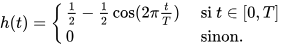

Celle ci permet d'atténuer les amplitudes du signal aux extrémités et améliore la résolution fréquentielle.

Dans notre cas, elle lisse le sprectre d'amplitude et permet de le rendre plus propre. Les perturbations entre les pics sont atténuées, ainsi que l'extrémité positive (analogue aux spectre négatif invisible sur notre graphe) du spectre, dont les valeurs d'amplitudes sont bien moindre.

7) A partir des résultats obtenus, donner une estimation de la période fondamentale $T$ du signal. Quelle est l’erreur de lecture sur cette période ?

Estimation depuis le signal temporel : 

On calcule la différence temporelle entre le premier et le second pic, ce qui équivaut environ à 0.5s

Estimation depuis les sprectre d'amplitude :  

On regarde la valeur fréquentielle du premier pic, ce qui équivaut environ à $\frac{1}{T}$ car notre fonction fréquentielle est définie par un peigne de dirac de période $\frac{1}{T}$. Ainsi, les deux résultats sont cohérents puisque la période calculée est également de 0.5s (fondamental à 2Hz)

L'erreur de lecture peut être directement liée à la fréquence d'échantillonnage de notre signal. Dans notre cas, celle-ci est de 100Hz, ce qui signifie que nous n'avons pas d'informations dans un interval de 0.02s centré sur chaque point (et dans ce problème, sur le pic). L'incertitude est donc de +/-0.1s